# Excercise 1: k-means clustering lecture example

Apply the KMeans clustering algorithm to the given data points and print out the cluster lables of the data points, the cluster centers and predict the cluster of the data points [0, 0] and [5, 3].

In [16]:
from sklearn.cluster import KMeans
import numpy as np

# Generate data
X = np.array([[1, 2], [0, 1], [4, 2],[5, 4], [6, 1], [1, 4]])

kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.predict([[0, 0], [5, 3]]))

print(kmeans.inertia_)


[1 1 0 0 0 1]
[[5.         2.33333333]
 [0.66666667 2.33333333]]
[1 0]
12.0


Plot the clusters and the cluster centers.

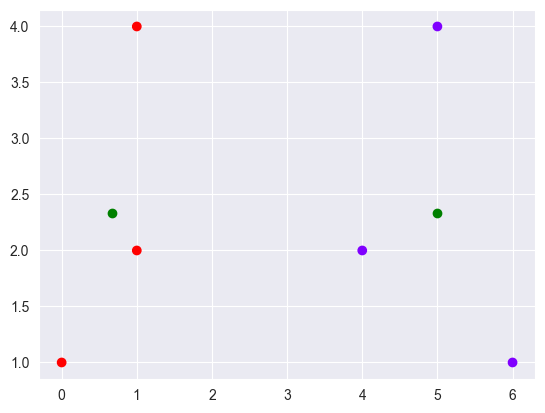

In [17]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap = 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color='green')
plt.show()

# Excercise 2: k-means clustering with several larger data sets

Run the following cell to generate four larger datasets `XBalls`, `XBMouse`, `XMoons` and `Xcircels`.

In [18]:
import numpy as np
import matplotlib.pyplot as plt

def bubbleSetNormal(mx,my,number,s):
    x = np.random.normal(0, s, number) + mx
    y = np.random.normal(0, s, number) + my
    return(x,y)

def fourBalls(n1,n2,n3,n4):
    np.random.seed(42)        
    dataset = np.zeros( (n1+n2+n3+n4,2) )    
    (dataset[0:n1,0],dataset[0:n1,1])     = bubbleSetNormal( 2.5, 1.0,n1,0.5)     
    (dataset[n1:n1+n2,0],dataset[n1:n1+n2,1]) = bubbleSetNormal( 2.0,-3.0,n2,0.3)    
    (dataset[n1+n2:n1+n2+n3,0],dataset[n1+n2:n1+n2+n3,1]) = bubbleSetNormal(-2.0, 5.0,n3,0.6)   
    (dataset[n1+n2+n3:n1+n2+n3+n4,0],dataset[n1+n2+n3:n1+n2+n3+n4,1]) = bubbleSetNormal(-4.0,-1.0,n4,0.9)        
    return (dataset)   

def mouseShape():
    np.random.seed(42)        
    dataset = np.zeros( (1000,2) )    
    (dataset[0:150,0],dataset[0:150,1])     = bubbleSetNormal(-0.75, 0.75,150,0.15)     
    (dataset[150:300,0],dataset[150:300,1]) = bubbleSetNormal( 0.75, 0.75,150,0.15)    
    (dataset[300:1000,0],dataset[300:1000,1]) = bubbleSetNormal( 0, 0,700,0.29)   
    return (dataset) 

def twoMoonsProblem( SamplesPerMoon=240, pNoise=2):
    np.random.seed(42) 
    tMoon0 = np.linspace(0, np.pi, SamplesPerMoon)
    tMoon1 = np.linspace(0, np.pi, SamplesPerMoon)
    Moon0x = np.cos(tMoon0)
    Moon0y = np.sin(tMoon0)
    Moon1x = 1 - np.cos(tMoon1)
    Moon1y = 0.5 - np.sin(tMoon1) 
    X = np.vstack((np.append(Moon0x, Moon1x), np.append(Moon0y, Moon1y))).T
    X = X + pNoise/100*np.random.normal(size=X.shape)
    Y = np.hstack([np.zeros(SamplesPerMoon), np.ones(SamplesPerMoon)])
    return X, Y

def circels():
    np.random.seed(42) 
    phi = np.linspace(0,2*np.pi, 800)
    x1 = 1.5*np.cos(phi)
    y1 = 1.5*np.sin(phi) 
    x2 = 0.5*np.cos(phi)
    y2 = 0.5*np.sin(phi)
    X = np.vstack((np.append(x1,x2), np.append(y1,y2))).T
    X = X + 0.1*np.random.normal(size=X.shape)
    return(X)

n1=n2=200
n3=n4=200
# Testbeispiel 1
XBalls = fourBalls(n1,n2,n3,n4)

# Testbeispiel 2
XBMouse = mouseShape() 

# Testbeispiel 3
(XMoons,_) = twoMoonsProblem()

# Testbeispiel 4    
Xcircles = circels()

Take the dataset `XBMouse` and plot an ellbow plot to determine the optimal number of clusters. In addition, use the `KneeLocator` method from the kneed library to determine the optimal number of clusters.

In [19]:
# just to suppress the warning that the kmeans algorithm uses some memory it should not use

import warnings
warnings.filterwarnings('ignore')

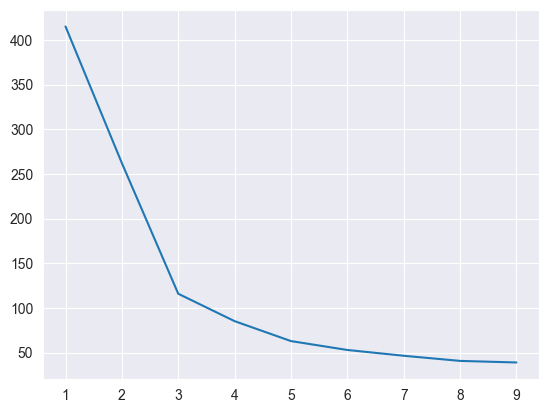

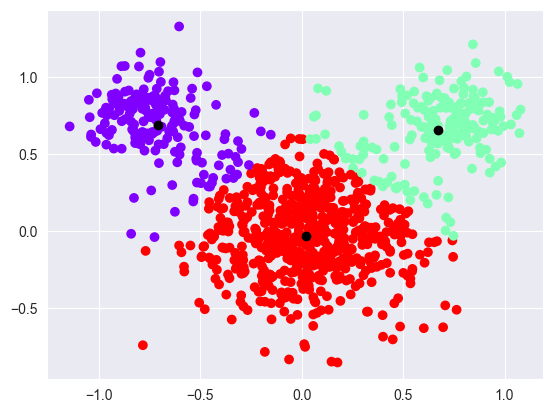

In [20]:
from kneed import KneeLocator
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

def findK(data):
    n_cluster = range(1, 10)
    jlist = []
    for i in n_cluster:
        km = KMeans(n_clusters=i, random_state=0).fit(data)
        jlist.append(km.inertia_)

    plt.plot(n_cluster, jlist)
    plt.show()

    kl = KneeLocator(n_cluster, jlist, curve='convex', direction='decreasing')
    return kl.elbow

def clusterAndPlot(data):
    k = findK(data)
    km = KMeans(n_clusters=k, random_state=0).fit(data)
    plt.scatter(data[:,0], data[:,1], c=km.labels_, cmap = 'rainbow')
    plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='black')
    plt.show()

clusterAndPlot(XBMouse)

Apply the k-Means algorithm to the data sets, think about the appropriate number of clusters and plot the clusters and the cluster centers. Which of the datasets can be clustered well with k-Means? What are the limitations of the approach? How to enable kmeans++ or random initialization with severl runs in scikit-learn?

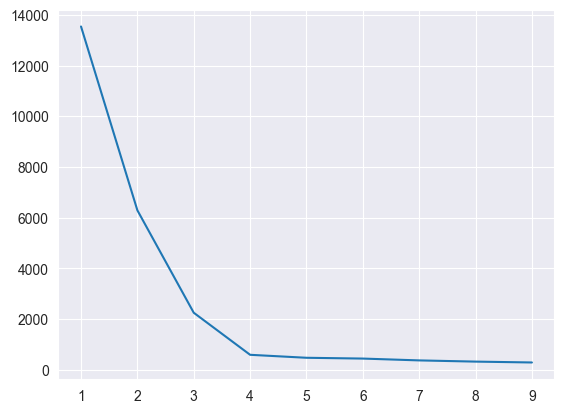

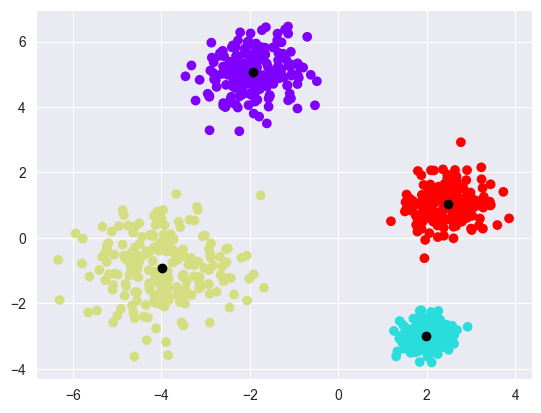

In [21]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusterAndPlot(XBalls)

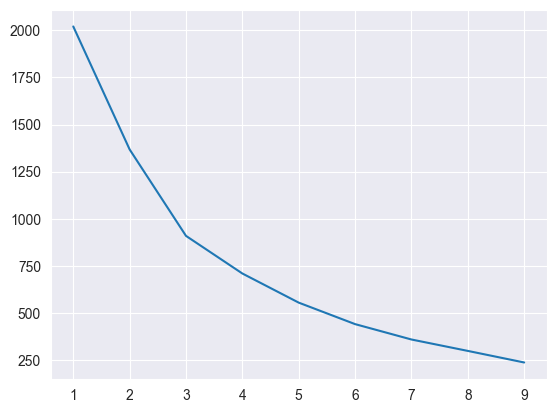

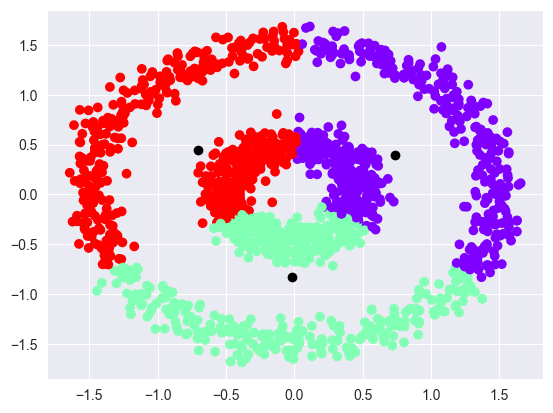

In [22]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

clusterAndPlot(Xcircles)

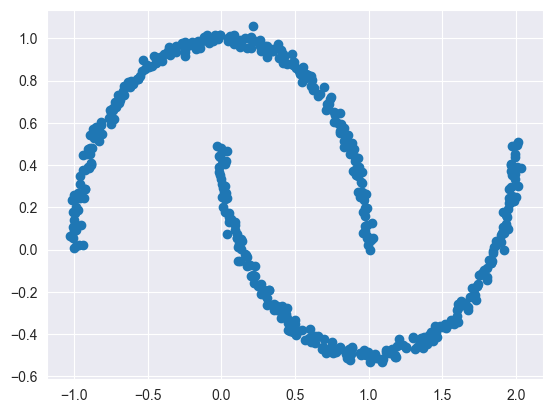

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = XMoons
plt.scatter(data[:,0], data[:,1])
plt.show()

In [24]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

...

Ellipsis